<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Mochammad_Nurendra_Project_Akhir_PDS_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+ deskripsi tujuan bisnis : Tujuan bisnis yang ingin dilakukan adalah supaya kita tahu musisi mana yang memiliki popularitas terhebat serta membandingkan satu musisi dengan musisi yang lainnya.
+ analisa pendekatan yang akan dilakukan : menggunakan pendekatan statistic.
+ pengumpulan data : Untuk pengumpulan data sendiri, saya mencari sebuah dataset di situs kaggle.com.
+ pemahaman terhadap data yang telah dikumpulkan : Setelah melakukan ekplorasi data, saya bisa mengetahui beberapa musisi maupun lagu yang menjadi favorit. Saya juga dapat membandingkan popularitas mereka supaya kita dapat mengetahui musisi mana yang memiliki lagu yang lebih menarik untuk di dengarkan.
+ persiapan data (eksplorasi data) : Memuat semua library yang diperlukan. Misal library matplotlib untuk melakukan pemrosesan data, file CSV I / O. Untuk setiap langkah akan diberikan penjelasan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

Melakukan import untuk nantinya dapat melihat data csv yang sudah di upload.

In [ ]:
import os
for dirname, _, filenames in os.walk('top_500_songs.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Membaca kumpulan data dan melihat lima baris teratas dengan menuliskan kode:

In [ ]:
df = pd.read_csv('top_500_songs.csv', encoding='ISO-8859-2')
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


Jadi di sini saya sudah memiliki data untuk lagu-lagu terbaik sepanjang masa. Dataset berisi 8 kolom. Semua kolom memiliki data kategorikal. Dan dengan nama dataset saya yakin itu pasti memiliki 500 baris. Setelah itu dilakukan konfirmasi dari data yang sudah disediakan :

In [ ]:
df.shape

(500, 9)

DATA CLEANING : sebelum eksplorasi, saya memeriksa apakah ada nilai yang hilang dalam dataset:

In [ ]:
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=="0"]
print(categorical_nan)

[]


Oke jadi hanya kolom 'Streak' yang memiliki nilai yang hilang. Saya mengisi nilai yang hilang ini dengan "Empty":

In [ ]:
for feature in categorical_nan:
    df[feature] = df[feature].fillna('Empty')

Tetapi sebelum melanjutkan, kita perlu memverifikasi apakah nilai yang hilang terisi atau tidak:

In [ ]:
df[categorical_nan].isna().sum()

streak      0
position    0
dtype: int64

DATA EXPLORATION:
jika sudah melakukan validasi, sekrang waktunya untuk ekplorasi dataset. Kali ini saya mencoba untuk Melakukan plotting diagram lingkaran untuk "lagu terhebat" menggunakan kolom "judul":

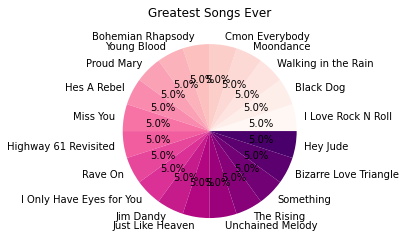

In [ ]:
color = plt.cm.RdPu(np.linspace(0,1,20))
df["title"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="artist",colors=color,autopct="%0.1f%%")
plt.title("Greatest Songs Ever")
plt.axis("off")
plt.show()

Kemudian saya juga mencoba membuat plotting diagram lingkaran untuk "lagu terhebat" menggunakan kolom "judul":

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



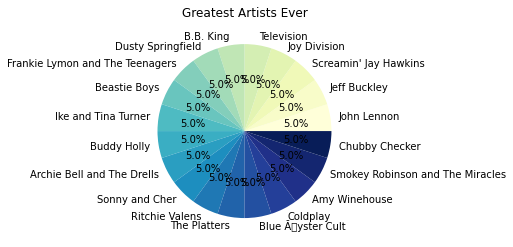

In [ ]:
color = plt.cm.YlGnBu(np.linspace(0,1,20))
df["artist"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="streak",colors=color,autopct="%0.1f%%")
plt.title("Greatest Artists Ever")
plt.axis("off")
plt.show()

Ekplorasi Penulis terhebat:

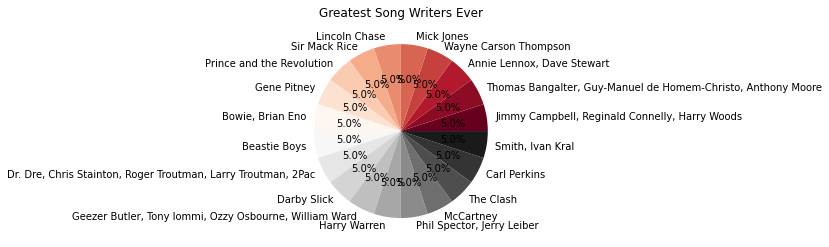

In [ ]:
color = plt.cm.RdGy(np.linspace(0,1,20))
df["writers"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="released",colors=color,autopct="%0.1f%%")
plt.title("Greatest Song Writers Ever")
plt.axis("off")
plt.show()

Ekplorasi Streaks terbesar dalam dataset

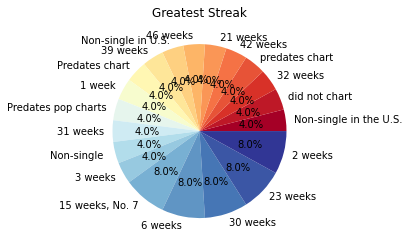

In [ ]:
color = plt.cm.RdYlBu(np.linspace(0,1,20))
df["streak"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="writer",colors=color,autopct="%0.1f%%")
plt.title("Greatest Streak")
plt.axis("off")
plt.show()

Eksplorasi terhebat sepanjang masa

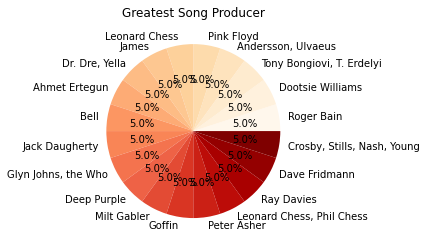

In [ ]:
color = plt.cm.OrRd(np.linspace(0,1,20))
df["producer"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="description",colors=color,autopct="%0.1f%%")
plt.title("Greatest Song Producer")
plt.axis("off")
plt.show()

Eksplorasi menurut tanggal rilis:

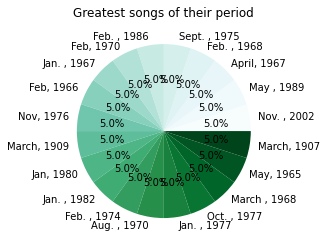

In [ ]:
color = plt.cm.BuGn(np.linspace(0,1,20))
df["released"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="title",colors=color,autopct="%0.1f%%")
plt.title("Greatest songs of their period")
plt.axis("off")
plt.show()

Sekarang, saya akan mengkoleksi data dalam variabel / kolom 'judul', 'artis', 'penulis' & 'produser' di kotak terpisah:

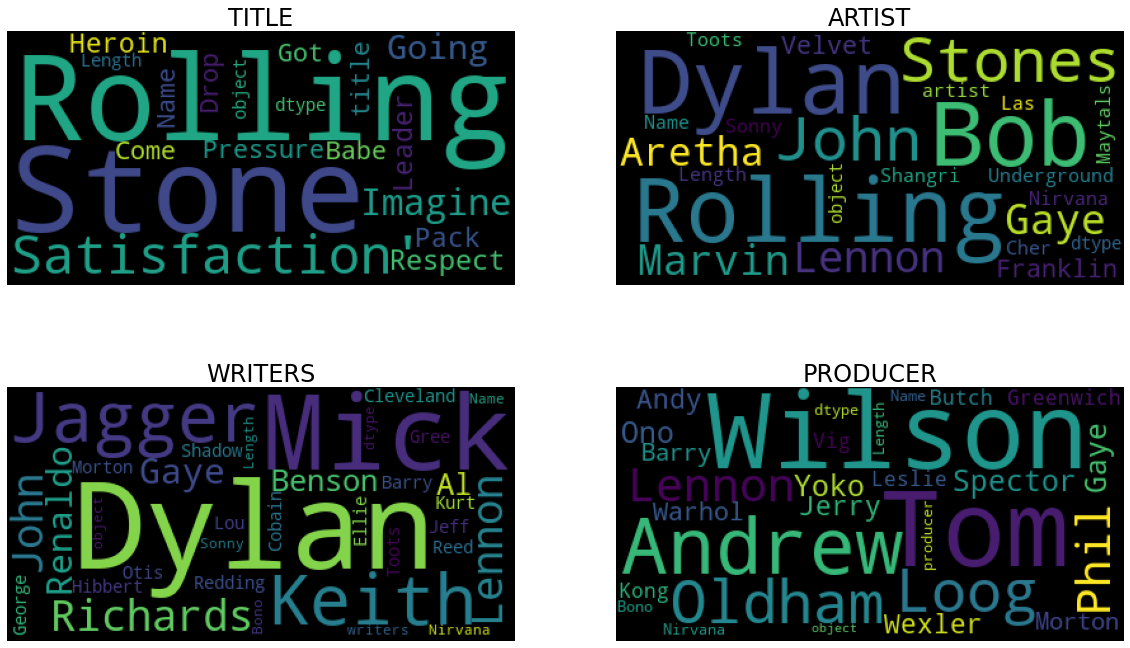

In [ ]:
text_cols = ['title', 'artist', 'writers', 'producer']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

setelah itu saya Sekarang akan eksplorasi untuk melihat kata-kata apa yang paling umum ** di daftar artis ** menggunakan WordCloud:

<Figure size 720x432 with 0 Axes>

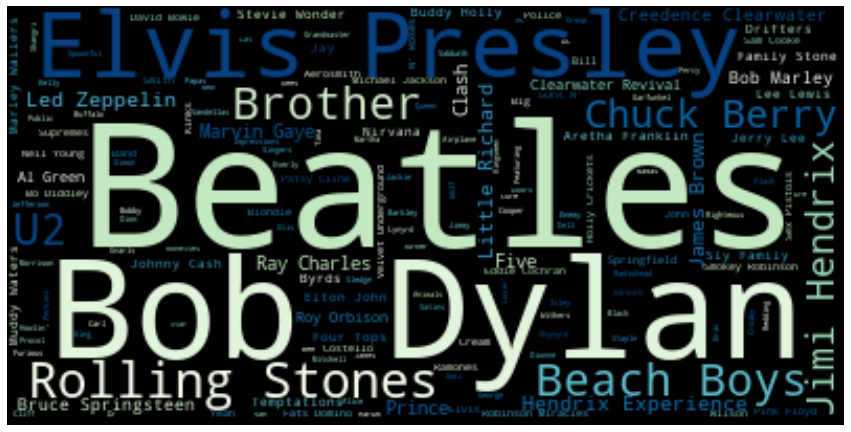

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.artist)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Kemudian saya ingin memeriksa popularitas Elton John, melalui grafik:

In [ ]:
elton = df[(df['artist']=='Elton John')].reset_index(drop=True)
elton.head(20)

,title,description,appears on,artist,writers,producer,released,streak,position
0,Rocket Man,"A perfect song for the age of moonwalks, this ...",Honky Chateau (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"May, 1972",15 weeks,No. 6
1,Tiny Dancer,Lyricist Taupin wrote this 1971 song about his...,Madman Across the Water (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Nov. , 1971",7 weeks,No. 41
2,Goodbye Yellow Brick Road,Inspired by the Rolling Stones' Goats Head Sou...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Sept. , 1973",17 weeks,No. 2
3,Candle in the Wind,Johnâs Marilyn Monroe tribute was a U.K. hit...,Goodbye Yellow Brick Road (Island),Elton John,"John, Bernie Taupin",Gus Dudgeon,"Oct. , 1973",Empty,Empty


Jadi Elton John datang 4 kali secara beruntun. Sekarang saya juga ingin memeriksa popularitas Jimi Hendrix:

In [ ]:
jimi = df[(df['artist']=='The Jimi Hendrix Experience')].reset_index(drop=True)
jimi.head(20)

,title,description,appears on,artist,writers,producer,released,streak,position
0,Purple Haze,It is one of the unforgettable opening riffs i...,Are You Experienced? (Experience Hendrix),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"March, 1967",8 weeks,No. 65
1,All Along the Watchtower,"""All Along the Watchtower"" had just been relea...",Electric Ladyland (MCA),The Jimi Hendrix Experience,Bob Dylan,Hendrix,"Sept, 1968",9 weeks,No. 20
2,Foxey Lady,"Heather Taylor, the future wife of the Who's R...",Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Aug, 1965",4 weeks,No. 67
3,Hey Joe,Thismurder ballad was the Experience's first s...,Are You Experienced? (MCA),The Jimi Hendrix Experience,William Roberts,Chas Chandler,"Dec, 1966",Did not chart,Empty
4,The Wind Cries Mary,A dish-smashing argument with his girlfriend l...,Are You Experienced? (MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"May , 1967",8 weeks,No. 65
5,Little Wing,Blissed out from his appearance at Monterey Po...,Axis: Bold as Love (Experience Hendrix/MCA),The Jimi Hendrix Experience,Hendrix,Chas Chandler,"Feb. , 1968",Non-single,Empty


saya memeriksa popularitas Elvis Presley: 

In [ ]:
elvis = df[(df['artist']=='Elvis Presley')].reset_index(drop=True)
elvis.head(20)

,title,description,appears on,artist,writers,producer,released,streak,position
0,Hound Dog,"""Hound Dog"" was a hit before Elvis Presley san...",Elvis 30 #1 Hits (RCA),Elvis Presley,"Jerry Leiber, Mike Stoller",Steve Sholes,"July, 1956",28 weeks,No. 1
1,Heartbreak Hotel,"When RCA Records signed ""hillbilly cat"" Presle...",Elvis 30 #1 Hits (RCA),Elvis Presley,"Mae Boren Axton, Tommy Durden, Presley",Steve Sholes,"Jan, 1956",27 weeks,No. 1
2,Suspicious Minds,When Moman presented this song to Presley in 1...,Elvis 30 #1 Hits (RCA),Elvis Presley,Mark James,"Chips Moman, Felton Jarvis, Presley","Sept. , 1969",15 weeks,No. 1
3,Mystery Train,"""Mystery Train"" is one of Presley's most haunt...",Sunrise (RCA),Elvis Presley,"Junior Parker, Sam Phillips",Phillips,"Sept. , 1955",Did not chart,Empty
4,Jailhouse Rock,Songwriters Leiber and Stoller had already pen...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Jerry Leiber, Mike Stoller",Steve Sholes,"Oct. , 1957","27 weeks, No. 1",Empty
5,Suspicious Minds,When Moman presented this song to Presley in 1...,Elvis 30 #1 Hits (RCA),Elvis Presley,Mark James,"Chips Moman, Felton Jarvis, Presley","Sept. , 1969",15 weeks,No. 1
6,Mystery Train,"""Mystery Train"" is one of Presley's most haunt...",Sunrise (RCA),Elvis Presley,"Junior Parker, Sam Phillips",Phillips,"Sept. , 1955",Did not chart,Empty
7,Jailhouse Rock,Songwriters Leiber and Stoller had already pen...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Jerry Leiber, Mike Stoller",Steve Sholes,"Oct. , 1957","27 weeks, No. 1",Empty
8,Dont Be Cruel,Slapping the back of his guitar for extra perc...,Elvis: 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"July , 1956",27 weeks,No. 1
9,All Shook Up,Songwriter Al Stanton walked up to Blackwell o...,Elvis 30 #1 Hits (RCA),Elvis Presley,"Otis Blackwell, Presley",Steve Sholes,"March , 1957",30 weeks,No. 1


EVALUASI MODEL:
Dalam melakukan Exploratory Data Analysis banyak hal mendasar terkait data yang dapat kita ketahui, dengan mengetahui isi dari dataset secara detail, data tersebut akan membantu kita dalam mendapat informasi yang kita inginkan. Dalam project ini saya hanya berusaha melakukan eksplorasi data dengan menggunakan pendekatan statistic. Sebenarnya masih banyak yang dapat dilakukan untuk memperoleh info dari data yang punya. Tapi berhubung pemahaman saya kurang, jadi eksplorasi yang dapat saya capai yaitu mencari lagu terhebat, memeriksa popularitas pada tiap musisi & mengkoleksi data dalam variabel / kolom.